<a href="https://colab.research.google.com/github/Srijit125/CE880CaseStudy/blob/main/CTG%20Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/fetal_health.csv')
df.head()
df.shape

(2126, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [9]:
df[df.duplicated()]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


In [10]:
df_dup = df.drop_duplicates(subset = None , keep = 'first', inplace = False)

In [12]:
import numpy as np

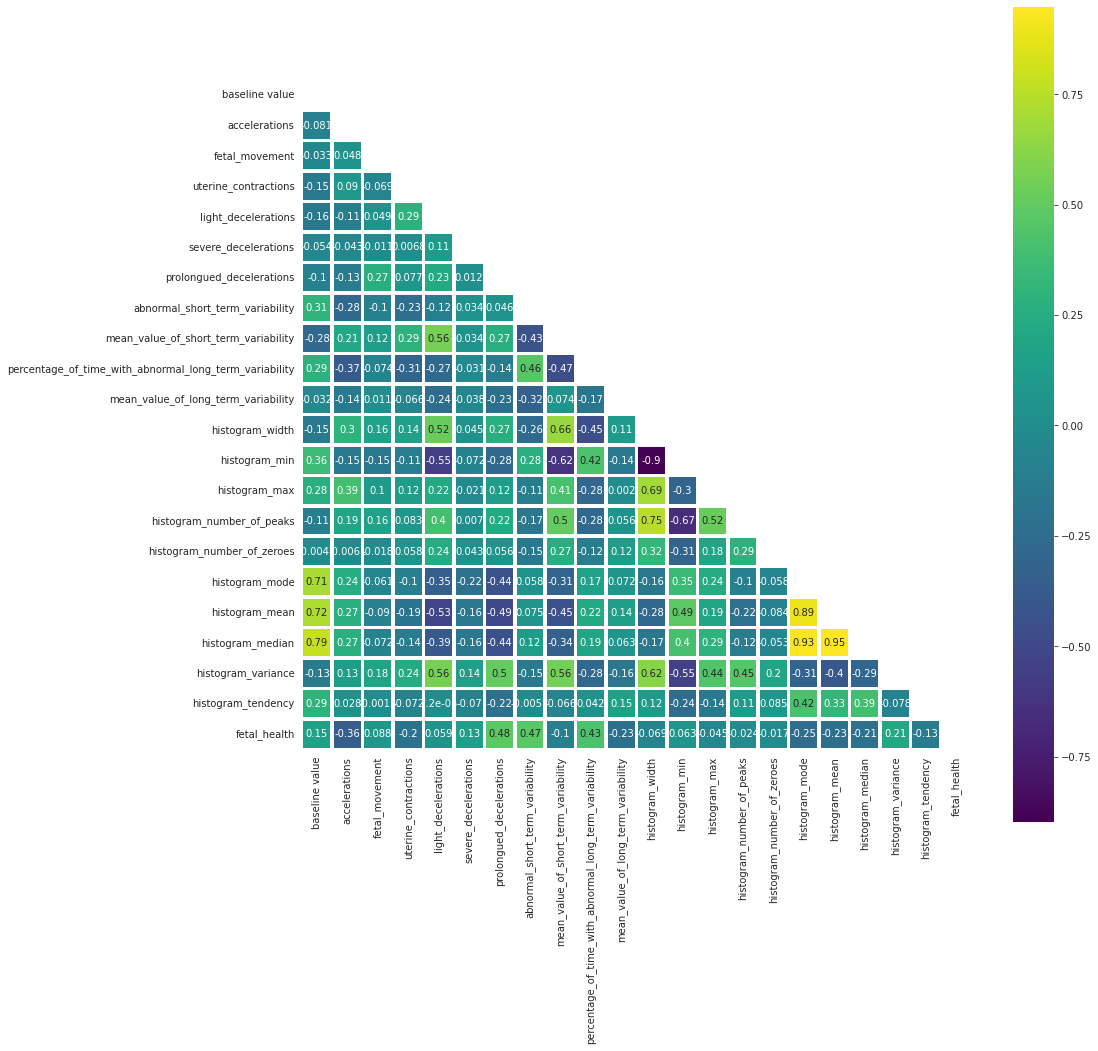

In [13]:
Target = df["fetal_health"]
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="viridis",annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


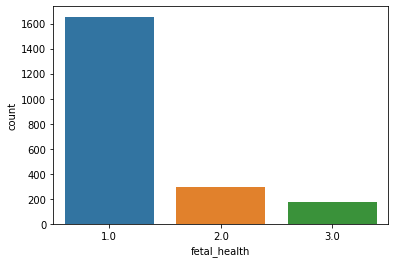

In [14]:
sns.countplot(Target)
plt.show()

In [15]:
print("Count of type 1.0 fetal health in the dataset ",len(df.loc[df["fetal_health"]==1.0]))
print("Count of type 2.0 fetal health in the dataset ",len(df.loc[df["fetal_health"]==2.0]))
print("Count of type 3.0 fetal health in the dataset ",len(df.loc[df["fetal_health"]==3.0]))

Count of type 1.0 fetal health in the dataset  1655
Count of type 2.0 fetal health in the dataset  295
Count of type 3.0 fetal health in the dataset  176


Splitting the dataset with dependent and independent features

In [16]:
X = df_dup.iloc[:,:-1]
y = df_dup.iloc[:,-1]

Scaling the dataset

In [17]:
scale = StandardScaler()
X = scale.fit_transform(X)
X = pd.DataFrame(X,columns=df_dup.iloc[:,:-1].columns)

In [19]:
import statsmodels.api as sm
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1690, 22)
y_train (1690,)
X_test (423, 22)
y_test (423,)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
from sklearn.metrics import classification_report

In [22]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [23]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

Decision Tree Classification

In [31]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini',max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6, random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)
train_report = get_train_report(decision_tree)
print(train_report) 

              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95      1320
         2.0       0.82      0.62      0.71       237
         3.0       0.90      0.92      0.91       133

    accuracy                           0.92      1690
   macro avg       0.88      0.84      0.85      1690
weighted avg       0.91      0.92      0.91      1690



In [32]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.92      0.95      0.94       326
         2.0       0.76      0.62      0.68        55
         3.0       0.87      0.81      0.84        42

    accuracy                           0.90       423
   macro avg       0.85      0.79      0.82       423
weighted avg       0.89      0.90      0.89       423



Random Forest Classifier

In [33]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)
train_report = get_train_report(rf_model)
print(train_report)

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      1320
         2.0       0.99      0.97      0.98       237
         3.0       1.00      0.98      0.99       133

    accuracy                           0.99      1690
   macro avg       1.00      0.98      0.99      1690
weighted avg       0.99      0.99      0.99      1690



In [35]:
test_report = get_test_report(rf_model)
print(test_report)


              precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       326
         2.0       0.82      0.67      0.74        55
         3.0       0.92      0.79      0.85        42

    accuracy                           0.92       423
   macro avg       0.89      0.81      0.85       423
weighted avg       0.92      0.92      0.92       423



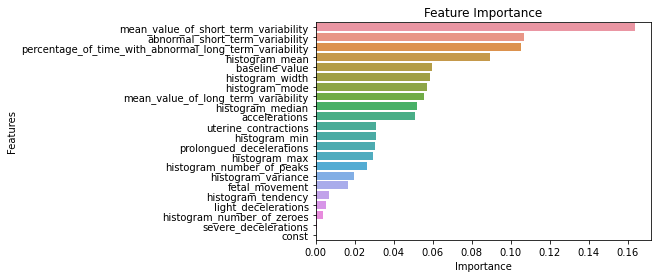

In [38]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

K Nearest Neighbour 

In [40]:
from sklearn.metrics import confusion_matrix,roc_curve

In [42]:
knn_classification = KNeighborsClassifier(n_neighbors = 5)
knn_model = knn_classification.fit(X_train, y_train)
train_report = get_train_report(knn_model)
print(train_report)

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96      1320
         2.0       0.86      0.71      0.78       237
         3.0       0.96      0.82      0.88       133

    accuracy                           0.93      1690
   macro avg       0.92      0.84      0.88      1690
weighted avg       0.93      0.93      0.93      1690



In [43]:
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94       326
         2.0       0.73      0.64      0.68        55
         3.0       0.89      0.60      0.71        42

    accuracy                           0.89       423
   macro avg       0.85      0.73      0.78       423
weighted avg       0.89      0.89      0.89       423



Support Vendor Machine

In [45]:
svc_model = SVC(kernel='poly',probability=True)
svc_model.fit(X_train,y_train)
SVC(kernel='poly', probability=True)
train_report = get_train_report(svc_model)
print(train_report)
test_report = get_test_report(svc_model)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96      1320
         2.0       0.79      0.63      0.70       237
         3.0       0.99      0.81      0.89       133

    accuracy                           0.92      1690
   macro avg       0.90      0.81      0.85      1690
weighted avg       0.92      0.92      0.92      1690

              precision    recall  f1-score   support

         1.0       0.92      0.97      0.95       326
         2.0       0.69      0.60      0.64        55
         3.0       0.90      0.67      0.77        42

    accuracy                           0.89       423
   macro avg       0.84      0.75      0.78       423
weighted avg       0.89      0.89      0.89       423

